In [219]:
import pandas as pd
import numpy as np

In [220]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/outlier-remove.csv')

df.columns

Index(['code', 'name', 'pre_per', 'roe', 'pro_margin', 'equity_ratio',
       'fixed_net_cash_ratio', 'real_pbr', 'pre_pbr', 'pre_error',
       'pbr_ratio'],
      dtype='object')

In [221]:

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

# 結果の確認
df.dtypes

code                     object
name                     object
pre_per                 float64
roe                     float64
pro_margin              float64
equity_ratio            float64
fixed_net_cash_ratio    float64
real_pbr                float64
pre_pbr                 float64
pre_error               float64
pbr_ratio               float64
dtype: object

In [222]:
df.head()

,code,name,pre_per,roe,pro_margin,equity_ratio,fixed_net_cash_ratio,real_pbr,pre_pbr,pre_error,pbr_ratio
0,2914,本たばこ産業,17.7,4.8,10.3,45.0,-15.396873,2.1,0.573523,1.526477,0.273106
1,6098,リクルートHD,30.4,19.7,11.8,61.8,18.321158,6.8,5.196004,1.603996,0.764118
2,6501,立製作所,23.7,10.5,9.9,44.0,-3.607947,2.9,2.519439,0.380561,0.868772
3,6758,ソニーG,20.8,11.9,10.7,22.7,-38.588489,2.7,2.197070,0.502930,0.813730
4,7203,トヨタ自動車,8.1,13.8,11.9,37.9,-21.221911,1.0,2.053175,-1.053175,2.053175


In [223]:
r_df = df.drop(columns=['code', 'name', 'pre_pbr', 'pre_error', 'pbr_ratio'])

r_df.head()

,pre_per,roe,pro_margin,equity_ratio,fixed_net_cash_ratio,real_pbr
0,17.7,4.8,10.3,45.0,-15.396873,2.1
1,30.4,19.7,11.8,61.8,18.321158,6.8
2,23.7,10.5,9.9,44.0,-3.607947,2.9
3,20.8,11.9,10.7,22.7,-38.588489,2.7
4,8.1,13.8,11.9,37.9,-21.221911,1.0


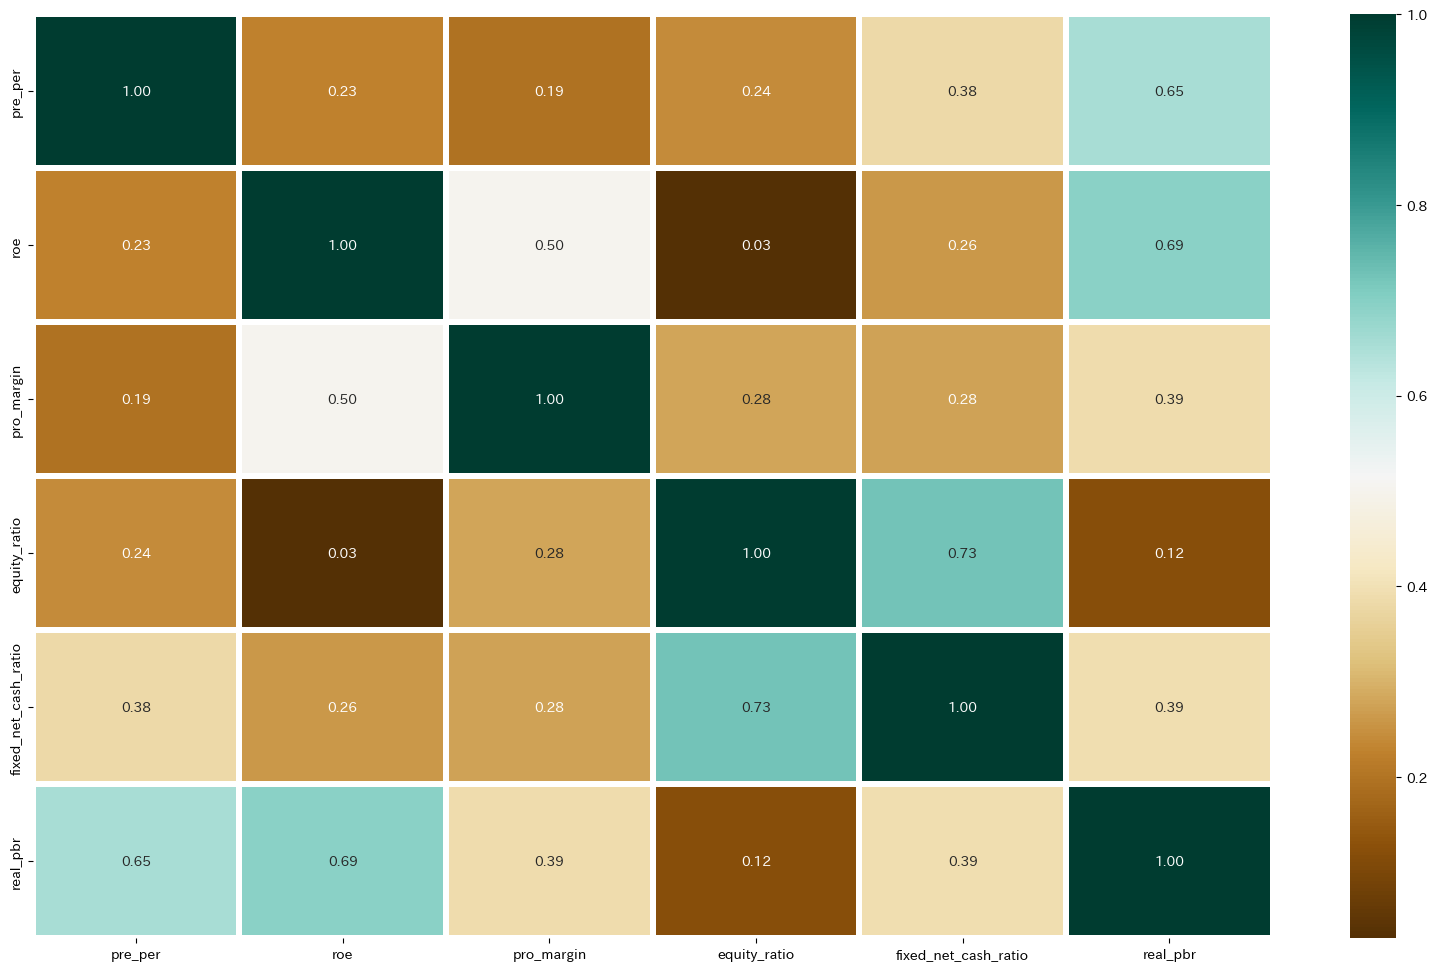

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = r_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## 本番

In [225]:
r_df.columns

Index(['pre_per', 'roe', 'pro_margin', 'equity_ratio', 'fixed_net_cash_ratio',
       'real_pbr'],
      dtype='object')

In [226]:
X = r_df[['pre_per', 'roe', 'equity_ratio', 'fixed_net_cash_ratio']]
# X = r_df.drop(columns=['real_pbr', 'pro_margin'])
y = r_df['real_pbr']

X

,pre_per,roe,equity_ratio,fixed_net_cash_ratio
0,17.7,4.8,45.0,-15.396873
1,30.4,19.7,61.8,18.321158
2,23.7,10.5,44.0,-3.607947
3,20.8,11.9,22.7,-38.588489
4,8.1,13.8,37.9,-21.221911
...,...,...,...,...
366,10.2,10.6,24.0,-3.482661
367,7.7,7.5,39.7,-19.636967
368,12.8,4.2,50.1,-22.423198
369,19.3,27.2,53.5,33.759335


### 交差検証

In [227]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.83411447 0.77782104 0.62287541 0.59426618 0.7687118 ]
平均決定係数 (R²): 0.7195577796336011
平均二乗誤差 (MSE) scores: [-0.96797527 -1.84090932 -0.92547654 -2.91391565 -0.70485122]
平均二乗誤差 (MSE): -1.4706256021005413
平均絶対誤差 (MAE) scores: [-0.64779981 -0.72344316 -0.72011973 -0.76259063 -0.65428205]
平均絶対誤差 (MAE): -0.7016470746747631


### リッジ

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ridge回帰の交差検証付きモデル
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# パイプラインの作成
pipe_line = make_pipeline(StandardScaler(), ridge_cv_model)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {}'.format(-np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {}'.format(-np.mean(mae_scores)))


決定係数 (R²) scores: [0.83378393 0.77050536 0.63928072 0.59116569 0.78351417]
平均決定係数 (R²): 0.7236499730931507
平均二乗誤差 (MSE) scores: [-0.96990399 -1.90152488 -0.88521737 -2.93618292 -0.65974097]
平均二乗誤差 (MSE): 1.4705140270864288
平均絶対誤差 (MAE) scores: [-0.64202374 -0.72731219 -0.70030005 -0.74410776 -0.62359924]
平均絶対誤差 (MAE): 0.6874685970358236


In [229]:
r_df.columns

Index(['pre_per', 'roe', 'pro_margin', 'equity_ratio', 'fixed_net_cash_ratio',
       'real_pbr'],
      dtype='object')

### 予測モデル構築

In [230]:
company_names_col = df[['code','name']]

company_names_col

,code,name
0,2914,本たばこ産業
1,6098,リクルートHD
2,6501,立製作所
3,6758,ソニーG
4,7203,トヨタ自動車
...,...,...
366,7451,三菱食品
367,8242,エイチ･ツー･オーリテイリング
368,8273,イズミ
369,9744,メイテックGHD


In [231]:
from sklearn.linear_model import Ridge


sc = StandardScaler()
X_sc = sc.fit_transform(X)

lr = Ridge()
lr.fit(X_sc, y)

lr_pred = lr.predict(X_sc)

r_df = r_df.copy()

r_df['Pre_PBR'] = lr_pred
r_df['Pre_Error'] = r_df['real_pbr'] - lr_pred
r_df['PBR-Ratio'] =  lr_pred / r_df['real_pbr']
r_df[['code', 'company_name']] = company_names_col


r_df.head(10)

,pre_per,roe,pro_margin,equity_ratio,fixed_net_cash_ratio,real_pbr,Pre_PBR,Pre_Error,PBR-Ratio,code,company_name
0,17.7,4.8,10.3,45.0,-15.396873,2.1,0.934897,1.165103,0.445189,2914,本たばこ産業
1,30.4,19.7,11.8,61.8,18.321158,6.8,5.960067,0.839933,0.876480,6098,リクルートHD
2,23.7,10.5,9.9,44.0,-3.607947,2.9,3.125122,-0.225122,1.077628,6501,立製作所
3,20.8,11.9,10.7,22.7,-38.588489,2.7,2.836160,-0.136160,1.050430,6758,ソニーG
4,8.1,13.8,11.9,37.9,-21.221911,1.0,1.471843,-0.471843,1.471843,7203,トヨタ自動車
5,11.1,15.3,4.6,38.0,-25.157451,1.7,2.130833,-0.430833,1.253431,8001,伊藤忠商事
6,17.1,29.6,28.7,70.1,12.315169,5.3,5.902441,-0.602441,1.113668,8035,東京エレクトロン
7,11.4,12.6,14.4,33.2,-28.661270,1.2,1.650336,-0.450336,1.375280,9432,本電信電話
8,14.9,12.4,16.7,31.5,-13.951116,2.0,2.348774,-0.348774,1.174387,9433,KDDI
9,20.3,18.5,14.4,16.2,-18.711051,3.9,4.527821,-0.627821,1.160980,9434,ソフトバンク


In [232]:
r_df.describe()

,pre_per,roe,pro_margin,equity_ratio,fixed_net_cash_ratio,real_pbr,Pre_PBR,Pre_Error,PBR-Ratio
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,3.710000e+02,371.000000
mean,17.118868,10.726954,11.537466,52.768733,-2.516596,2.127224,2.127224,-7.660838e-17,1.005138
std,8.543537,6.250183,9.783186,17.965440,23.605458,2.348199,2.032840,1.167947e+00,0.780096
min,3.300000,1.200000,0.800000,0.400000,-62.672706,0.300000,-1.021435,-4.225098e+00,-1.895288
25%,10.900000,7.000000,5.600000,38.550000,-17.806785,0.900000,0.737059,-4.672133e-01,0.698414
50%,15.700000,9.400000,9.000000,51.900000,-1.445024,1.400000,1.619814,-6.098454e-02,1.030846
75%,20.650000,13.000000,13.750000,65.750000,10.803236,2.300000,2.956003,4.316897e-01,1.255456
max,49.800000,48.500000,75.700000,92.000000,73.879159,21.200000,11.431744,1.203742e+01,6.499298


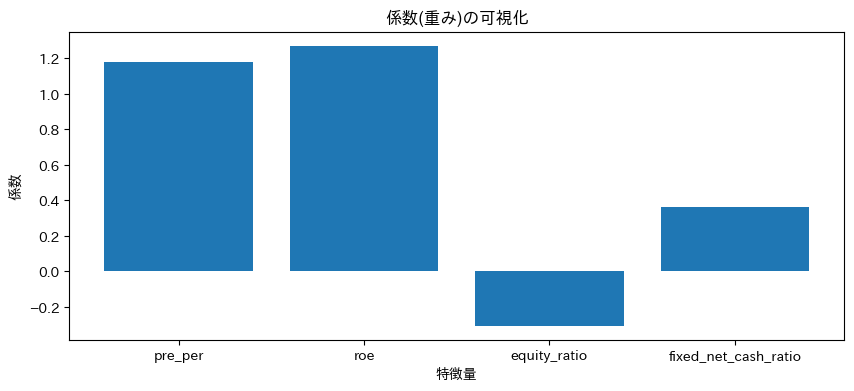

In [233]:
import matplotlib.pyplot as plt
import japanize_matplotlib

feature_names = X.columns


coefficients = lr.coef_

plt.figure(figsize=(10, 4))
plt.bar(feature_names, coefficients)
plt.xlabel('特徴量')
plt.ylabel('係数')
plt.title('係数(重み)の可視化')
plt.show()

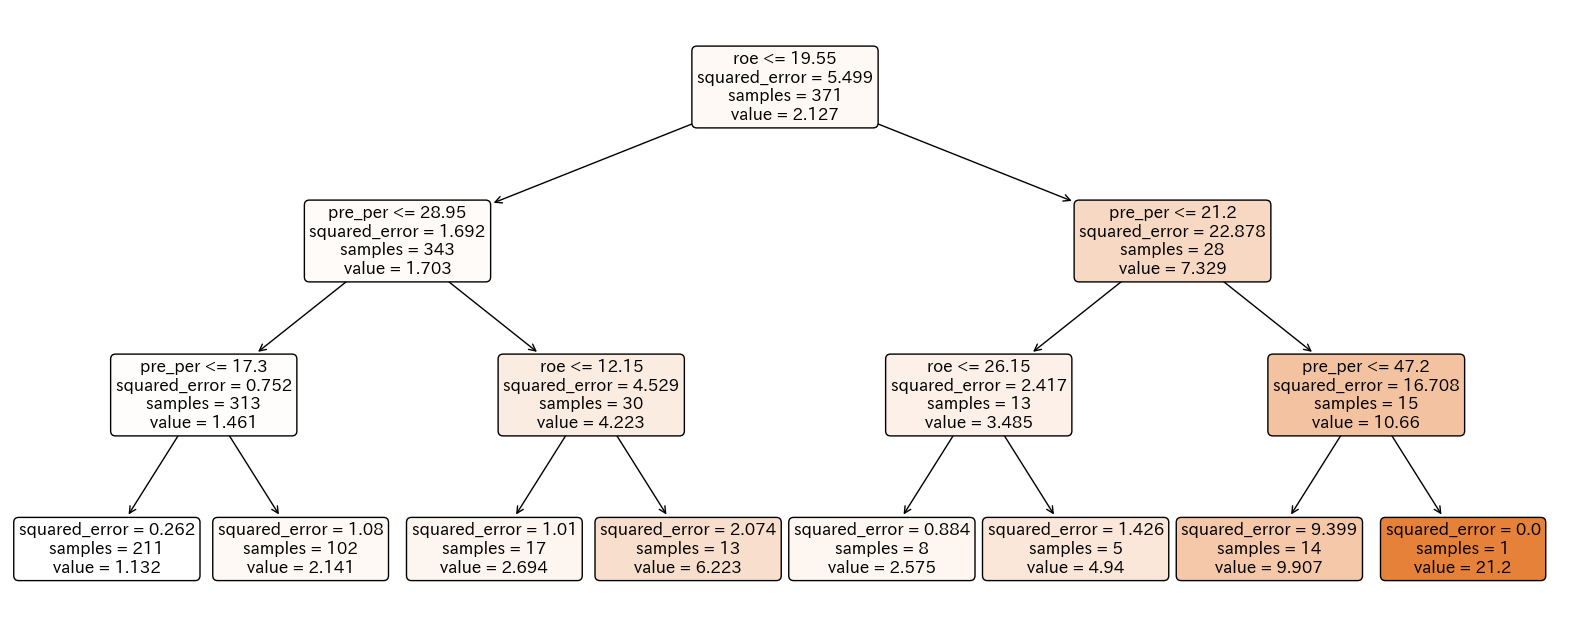

In [234]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(20, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

In [235]:
X

,pre_per,roe,equity_ratio,fixed_net_cash_ratio
0,17.7,4.8,45.0,-15.396873
1,30.4,19.7,61.8,18.321158
2,23.7,10.5,44.0,-3.607947
3,20.8,11.9,22.7,-38.588489
4,8.1,13.8,37.9,-21.221911
...,...,...,...,...
366,10.2,10.6,24.0,-3.482661
367,7.7,7.5,39.7,-19.636967
368,12.8,4.2,50.1,-22.423198
369,19.3,27.2,53.5,33.759335


In [236]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', '岡村製作所', 'NexTone',]

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [11.9, 14.8, 69.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 25.8, -7],       # AREHD
    [16.9, 13.9, 83.3, 14.23],      # 湖北工業
    [12.2, 19.03, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [8.3, 16.2, 58.7, 2.56],    # ナレルグループ
    [9.2, 11.9, 64, -7.74], # 岡村製作所
    [15.8, 25.22, 32.1, 61.25], # NexTone
#    [12.04, 9.08, 19.6, ], # 三菱UFJ 
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,会社名,pre_per,roe,equity_ratio,fixed_net_cash_ratio,予測PBR
0,明豊ファシリティワークス,11.9,14.80,69.5,0.00,1.987662
1,AREHD,8.4,11.30,25.8,-7.00,1.428585
2,湖北工業,16.9,13.90,83.3,14.23,2.479103
3,アドバンテッジリスクマネジメント,12.2,19.03,44.8,-1.64,3.287848
4,相鉄HD,10.0,12.30,24.0,-54.81,1.151438
5,ナレルグループ,8.3,16.20,58.7,2.56,1.998216
6,岡村製作所,9.2,11.90,64.0,-7.74,0.998038
7,NexTone,15.8,25.22,32.1,61.25,6.229092


In [237]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [18.2, 10.4, 55.4, 36.96], # 日水コン
     [17.8, 15.2, 76.8, 48.88], # インターメスティック
     [10.2, 7.1, 48.2, 10.72], # ワッツ
     [19.6, 2.3, 80.3, 43.73], # はてな
     [12.4, 15.3, 79.5, 19.38], # アイティーフォー
     [6.6, 6.9, 41.5, -35.82], # アサックス
     [6.7, 40, 36.6, -3.96], # グリーンズ
     [14.4, 15.5, 82, 63.36], # 福井コンピュータHD
     [8.5, 14.8, 45, 13.34], # CSS HD
     [13.7, 10.5, 71.1, 35.82], # ウィッツ
     [10.7, 8.4, 81.4, 51.37]
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 5.16526584,  2.77075078,  3.51101332,  0.7111301 ,  0.99249038,
        2.28525034, -0.42738203,  6.90444351,  3.23469264,  2.13982594,
        1.88254954,  1.10182411])

In [238]:
new_df = result_df[['会社名', '予測PBR']]

new_df

,会社名,予測PBR
0,明豊ファシリティワークス,1.987662
1,AREHD,1.428585
2,湖北工業,2.479103
3,アドバンテッジリスクマネジメント,3.287848
4,相鉄HD,1.151438
5,ナレルグループ,1.998216
6,岡村製作所,0.998038
7,NexTone,6.229092


In [239]:
new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]

new_df

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_78373/842131010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]


,会社名,予測PBR,実績PBR
0,明豊ファシリティワークス,1.987662,1.9
1,AREHD,1.428585,1.0
2,湖北工業,2.479103,2.3
3,アドバンテッジリスクマネジメント,3.287848,2.4
4,相鉄HD,1.151438,1.1
5,ナレルグループ,1.998216,1.5
6,岡村製作所,0.998038,1.1
7,NexTone,6.229092,4.2


In [240]:
new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']

df_sorted = new_df.sort_values(by='PBR-Ratio', ascending=False)

df_sorted

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_78373/3771652304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']


,会社名,予測PBR,実績PBR,PBR-Ratio
7,NexTone,6.229092,4.2,1.483117
1,AREHD,1.428585,1.0,1.428585
3,アドバンテッジリスクマネジメント,3.287848,2.4,1.369937
5,ナレルグループ,1.998216,1.5,1.332144
2,湖北工業,2.479103,2.3,1.077871
4,相鉄HD,1.151438,1.1,1.046762
0,明豊ファシリティワークス,1.987662,1.9,1.046138
6,岡村製作所,0.998038,1.1,0.907308


In [241]:
new_df.describe()

,予測PBR,実績PBR,PBR-Ratio
count,8.000000,8.000000,8.000000
mean,2.444998,1.937500,1.211483
std,1.700411,1.064945,0.215616
min,0.998038,1.000000,0.907308
25%,1.359298,1.100000,1.046606
50%,1.992939,1.700000,1.205008
75%,2.681290,2.325000,1.384599
max,6.229092,4.200000,1.483117
